# **ARAVINDAN N'S ADVANCED STATISTICS PROJECT NOTEBOOK**

In [2]:
!pip install factor_analyzer

     |████████████████████████████████| 40 kB 3.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=ecd753461ccc4c3e9bc7ce9324d2030b6a763e8e469ad832f878c76d0d8877c7
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **PROBLEM 1**

In [5]:
# Load the dataset
salary_df = pd.read_csv('./SalaryData.csv')
salary_df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [ ]:
# Display information about the dataset
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
# Statistical summary of the dataset
salary_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


In [ ]:
salary_df.groupby('Education')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelors,15.0,165152.933333,46596.777211,90135.0,141802.5,167431.0,190220.5,260151.0
Doctorate,16.0,208427.000000,43070.549855,115945.0,174643.5,220087.0,247832.0,257345.0
HS-grad,9.0,75038.777778,19839.481632,50103.0,52242.0,77743.0,90456.0,100678.0


In [ ]:
salary_df.groupby('Occupation')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Adm-clerical,10.0,141424.300000,50713.167251,75333.0,91388.50,157053.5,172574.75,220754.0
Exec-managerial,5.0,197117.600000,21287.039703,173664.0,173935.00,212448.0,212760.00,212781.0
Prof-specialty,13.0,168953.153846,76815.328725,90135.0,99185.00,133696.0,248156.00,257345.0
Sales,12.0,157604.416667,72012.073563,50103.0,125492.25,169100.0,198639.00,260151.0


In [ ]:
# Change education to categorical variable
salary_df.Education = pd.Categorical(salary_df.Education)

In [ ]:
# Change occupation to categorical variable
salary_df.Occupation = pd.Categorical(salary_df.Occupation)

In [ ]:
# Check the dataset again
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


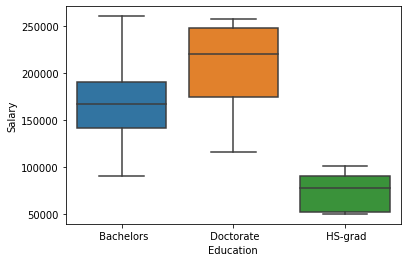

In [ ]:
sns.boxplot(data=salary_df, x='Education', y='Salary');

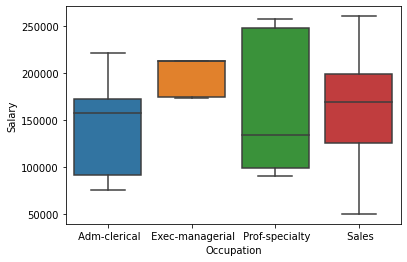

In [ ]:
sns.boxplot(data=salary_df, x='Occupation', y='Salary');

In [ ]:
# One way ANOVA of Salary wrt education
formula_1 = 'Salary ~ C(Education)'
model_1 = ols(formula_1, salary_df).fit()
aov_table_1 = anova_lm(model_1)
aov_table_1

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [ ]:
# One way ANOVA of Salary wrt occupation
formula_2 = 'Salary ~ C(Occupation)'
model_2 = ols(formula_2, salary_df).fit()
aov_table_2 = anova_lm(model_2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


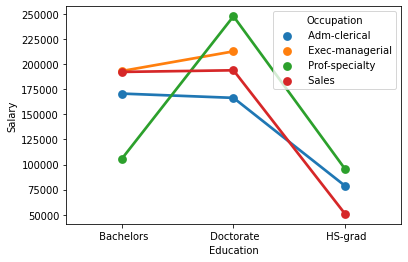

In [ ]:
# Interaction between education and occupation
sns.pointplot(data=salary_df, x='Education', y='Salary', hue='Occupation', ci=None);

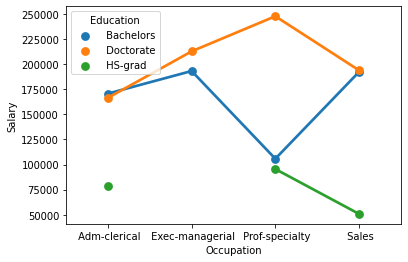

In [ ]:
# Interaction between occupation and education
sns.pointplot(data=salary_df, x='Occupation', y='Salary', hue='Education', ci=None);

In [ ]:
# Two way ANOVA
formula_3 = 'Salary ~ C(Education) + C(Occupation)'
model_3 = ols(formula_3, salary_df).fit()
aov_table_3 = anova_lm(model_3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [ ]:
# Two way ANOVA with interaction term
formula_4 = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model_4 = ols(formula_4, salary_df).fit()
aov_table_4 = anova_lm(model_4)
aov_table_4

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [ ]:
formula_5 = 'Salary ~ C(Education) + C(Occupation) + C(Occupation):C(Education)'
model_5 = ols(formula_5, salary_df).fit()
aov_table_5 = anova_lm(model_5)
aov_table_5

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Occupation):C(Education),6.0,3.529493e+10,5.882489e+09,8.272732,2.870842e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


# **PROBLEM 2**

## **DATASET LOADING**

In [ ]:
# Load the data dictionary
edu_dict= pd.read_excel('./Data Dictionary.xlsx', header=None)
edu_dict

,0,1,2
0,#,Column Name,Description
1,1,Names,Names of various university and colleges
2,2,Apps,Number of applications received
3,3,Accept,Number of applications accepted
4,4,Enroll,Number of new students enrolled
5,5,Top10perc,Percentage of new students from top 10% of Hig...
6,6,Top25perc,Percentage of new students from top 25% of Hig...
7,7,F.Undergrad,Number of full-time undergraduate students
8,8,P.Undergrad,Number of part-time undergraduate students
9,9,Outstate,Number of students for whom the particular col...


In [ ]:
# Load the dataset
edu_df= pd.read_csv('./Education_Post_12th_Standard.csv')
edu_df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
rows, cols = edu_df.shape
print('There are {} rows and {} columns in the datset'.format(rows,cols))

There are 777 rows and 18 columns in the datset


In [ ]:
# Information about the dataset
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## **UNI-VARIATE ANALYSIS**

In [ ]:
# Statistical summary of the dataset
edu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [ ]:
# Check if there are any duplicate entries
edu_df.duplicated().any()

False

In [ ]:
edu_df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [ ]:
col_list = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate']

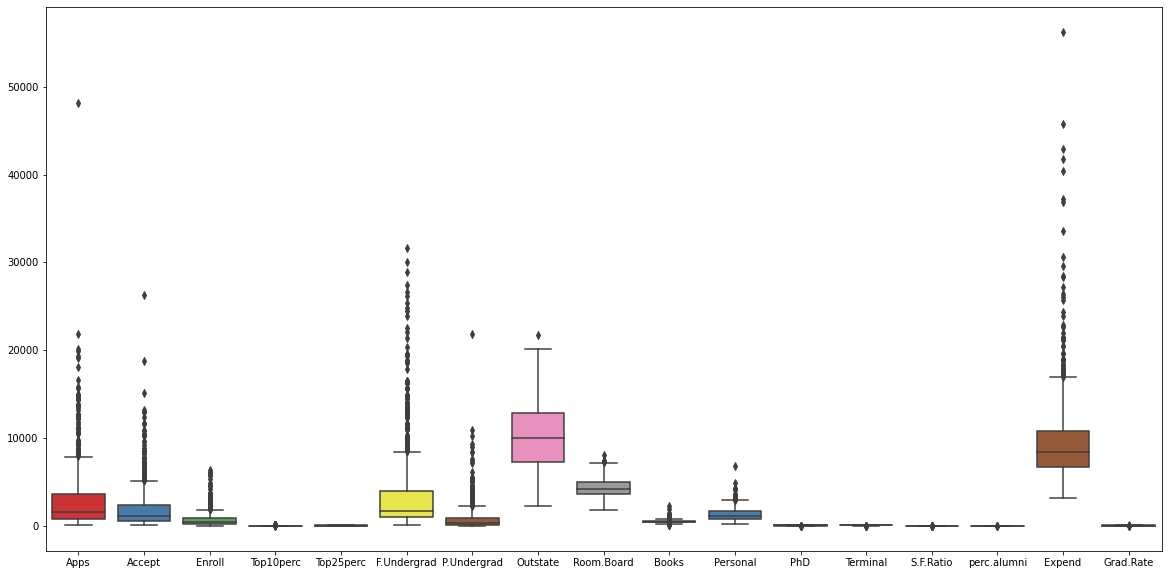

In [ ]:
# Box plot of the data before scaling
fig1, axes1 = plt.subplots(nrows=1,ncols=1)
fig1.set_size_inches(20, 10)
sns.boxplot(data=edu_df[col_list], palette='Set1');

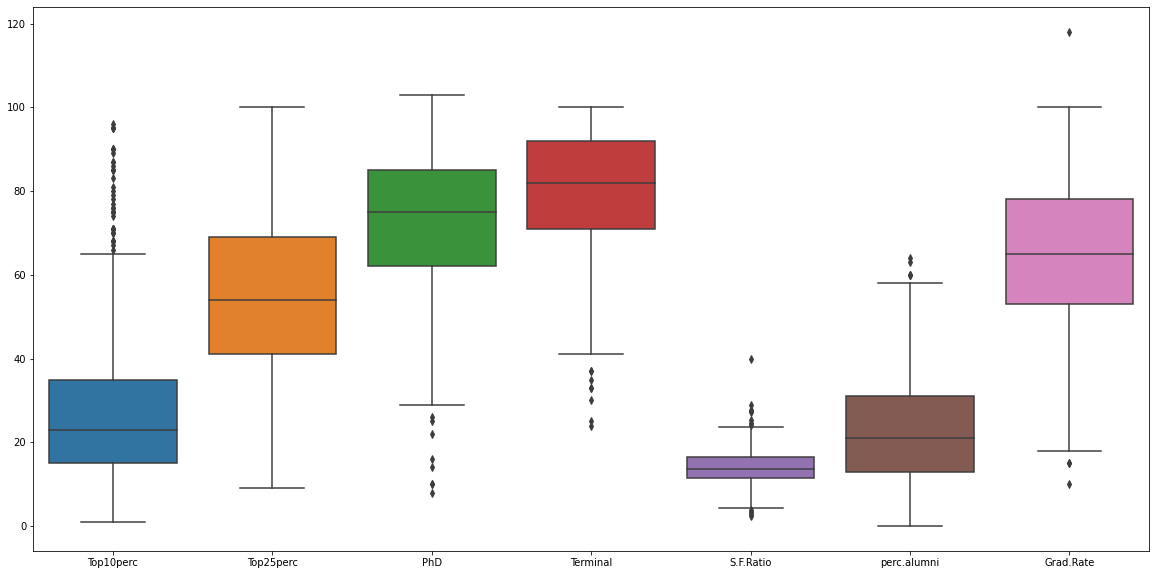

In [ ]:
fig2, axes2 = plt.subplots(nrows=1,ncols=1)
fig2.set_size_inches(20, 10)
sns.boxplot(data=edu_df[['Top10perc', 'Top25perc', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate']]);

Distribution and Box plots of the dataset

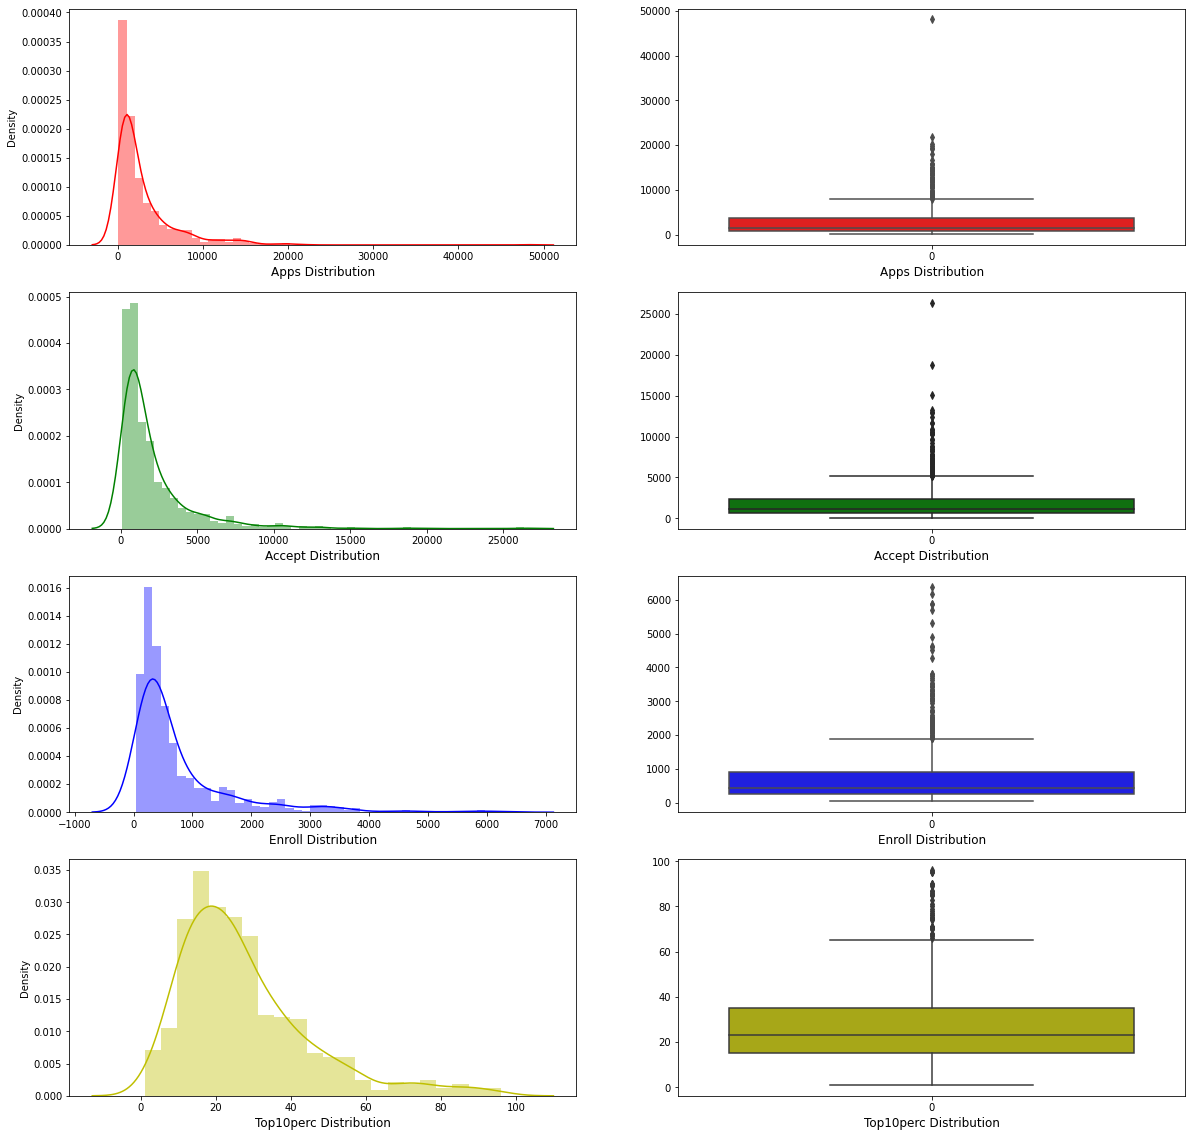

In [ ]:
fig3, axes3 = plt.subplots(nrows=4,ncols=2)
fig3.set_size_inches(20, 20)

a1 = sns.distplot(x=edu_df['Apps'], ax=axes3[0,0], color='R', );
a1.set_xlabel('Apps Distribution', size=12);
b1 = sns.boxplot(data=edu_df['Apps'], orient = "v", ax=axes3[0,1], color='R');
b1.set_xlabel('Apps Distribution', size=12);

a1 = sns.distplot(x=edu_df['Accept'], ax=axes3[1,0], color='G');
a1.set_xlabel('Accept Distribution', size=12);
b1 = sns.boxplot(data=edu_df['Accept'], orient = "v", ax=axes3[1,1], color='G');
b1.set_xlabel('Accept Distribution', size=12);

a1 = sns.distplot(x=edu_df['Enroll'], ax=axes3[2,0], color='B');
a1.set_xlabel('Enroll Distribution', size=12);
b1 = sns.boxplot(data=edu_df['Enroll'], orient = "v", ax=axes3[2,1], color='B');
b1.set_xlabel('Enroll Distribution', size=12);

a1 = sns.distplot(x=edu_df['Top10perc'], ax=axes3[3,0], color='Y');
a1.set_xlabel('Top10perc Distribution', size=12);
b1 = sns.boxplot(data=edu_df['Top10perc'], orient = "v", ax=axes3[3,1], color='Y');
b1.set_xlabel('Top10perc Distribution', size=12);

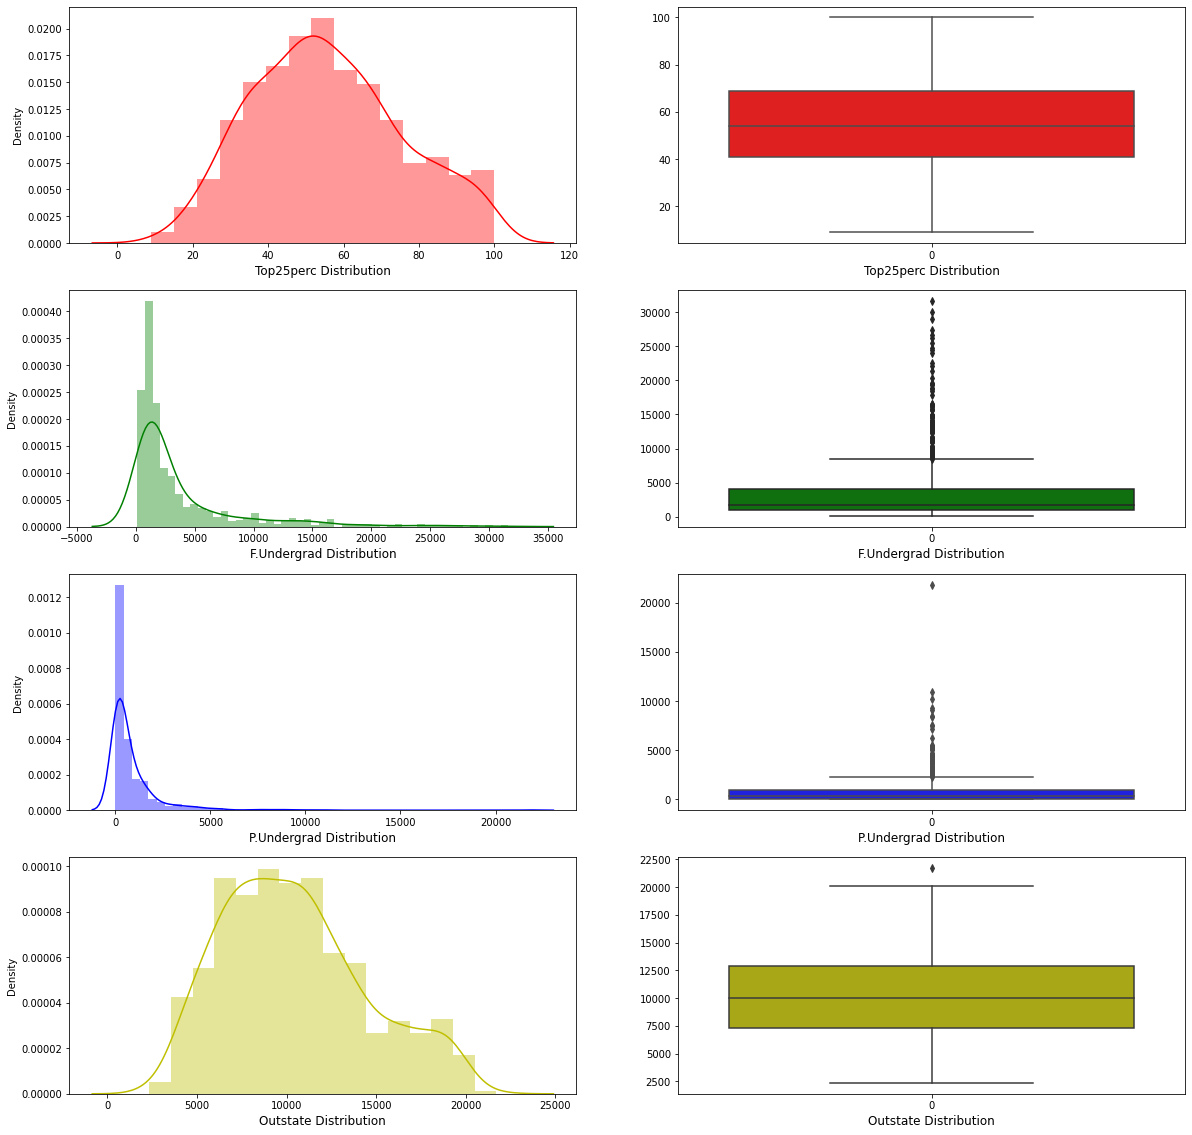

In [ ]:
fig4, axes4 = plt.subplots(nrows=4,ncols=2)
fig4.set_size_inches(20, 20)

a2 = sns.distplot(x=edu_df['Top25perc'], ax=axes4[0,0], color='R');
a2.set_xlabel('Top25perc Distribution', size=12);
b2 = sns.boxplot(data=edu_df['Top25perc'], orient = "v", ax=axes4[0,1], color='R');
b2.set_xlabel('Top25perc Distribution', size=12);

a2 = sns.distplot(x=edu_df['F.Undergrad'], ax=axes4[1,0], color='G');
a2.set_xlabel('F.Undergrad Distribution', size=12);
b2 = sns.boxplot(data=edu_df['F.Undergrad'], orient = "v", ax=axes4[1,1], color='G');
b2.set_xlabel('F.Undergrad Distribution', size=12);

a2 = sns.distplot(x=edu_df['P.Undergrad'], ax=axes4[2,0], color='B');
a2.set_xlabel('P.Undergrad Distribution', size=12);
b2 = sns.boxplot(data=edu_df['P.Undergrad'], orient = "v", ax=axes4[2,1], color='B');
b2.set_xlabel('P.Undergrad Distribution', size=12);

a2 = sns.distplot(x=edu_df['Outstate'], ax=axes4[3,0], color='Y');
a2.set_xlabel('Outstate Distribution', size=12);
b2 = sns.boxplot(data=edu_df['Outstate'], orient = "v", ax=axes4[3,1], color='Y');
b2.set_xlabel('Outstate Distribution', size=12);

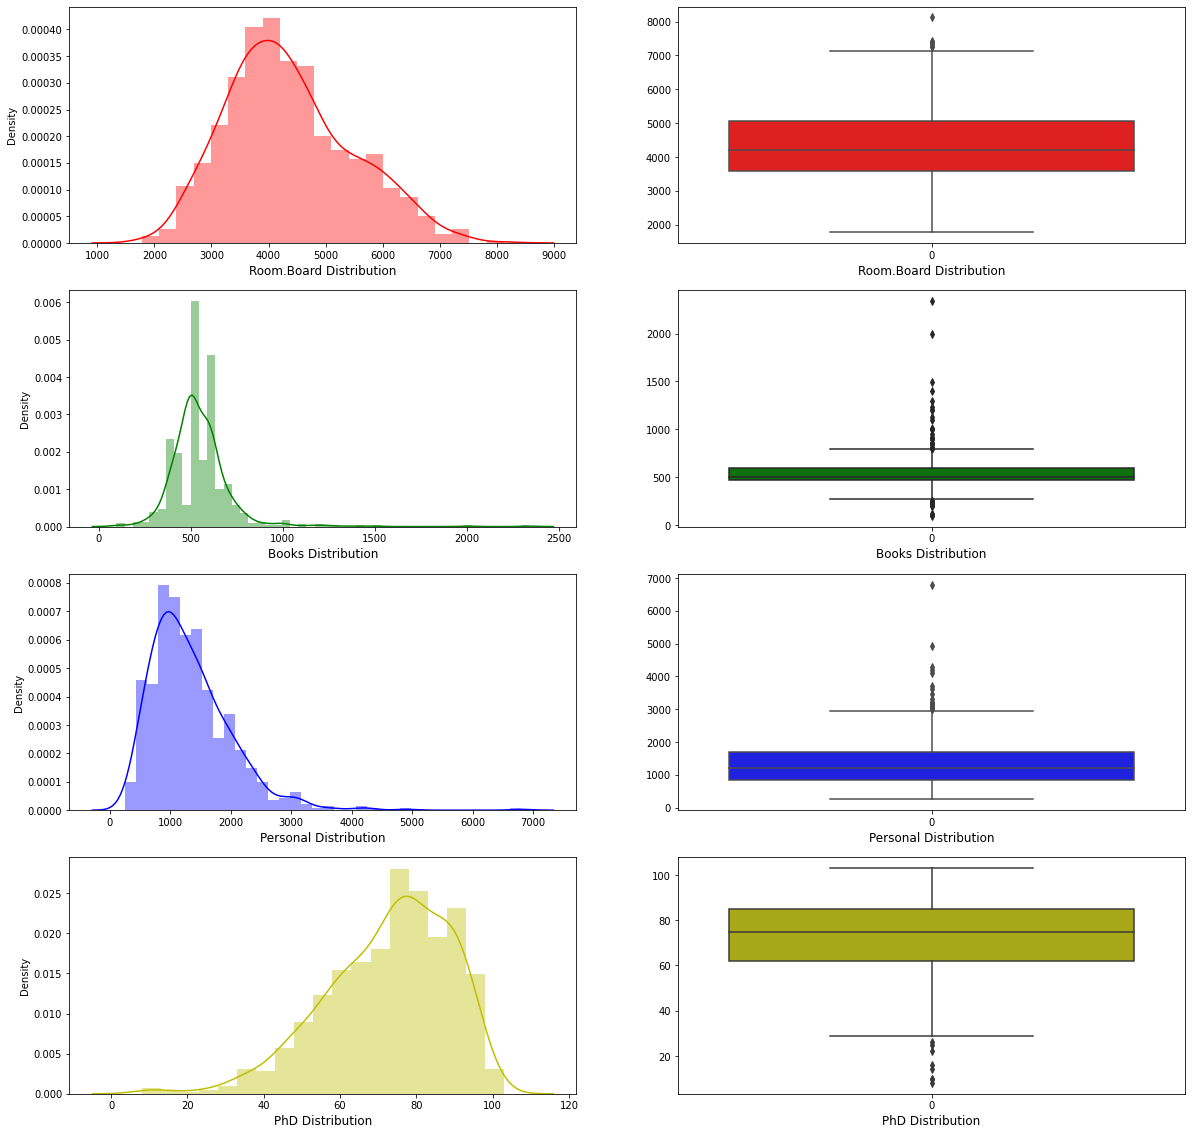

In [ ]:
fig5, axes5 = plt.subplots(nrows=4,ncols=2)
fig5.set_size_inches(20, 20)

a3 = sns.distplot(x=edu_df['Room.Board'], ax=axes5[0,0], color='R');
a3.set_xlabel('Room.Board Distribution', size=12);
b3 = sns.boxplot(data=edu_df['Room.Board'], orient = "v", ax=axes5[0,1], color='R');
b3.set_xlabel('Room.Board Distribution', size=12);

a3 = sns.distplot(x=edu_df['Books'], ax=axes5[1,0], color='G');
a3.set_xlabel('Books Distribution', size=12);
b3 = sns.boxplot(data=edu_df['Books'], orient = "v", ax=axes5[1,1], color='G');
b3.set_xlabel('Books Distribution', size=12);

a3 = sns.distplot(x=edu_df['Personal'], ax=axes5[2,0], color='B');
a3.set_xlabel('Personal Distribution', size=12);
b3 = sns.boxplot(data=edu_df['Personal'], orient = "v", ax=axes5[2,1], color='B');
b3.set_xlabel('Personal Distribution', size=12);

a3 = sns.distplot(x=edu_df['PhD'], ax=axes5[3,0], color='Y');
a3.set_xlabel('PhD Distribution', size=12);
b3 = sns.boxplot(data=edu_df['PhD'], orient = "v", ax=axes5[3,1], color='Y');
b3.set_xlabel('PhD Distribution', size=12);

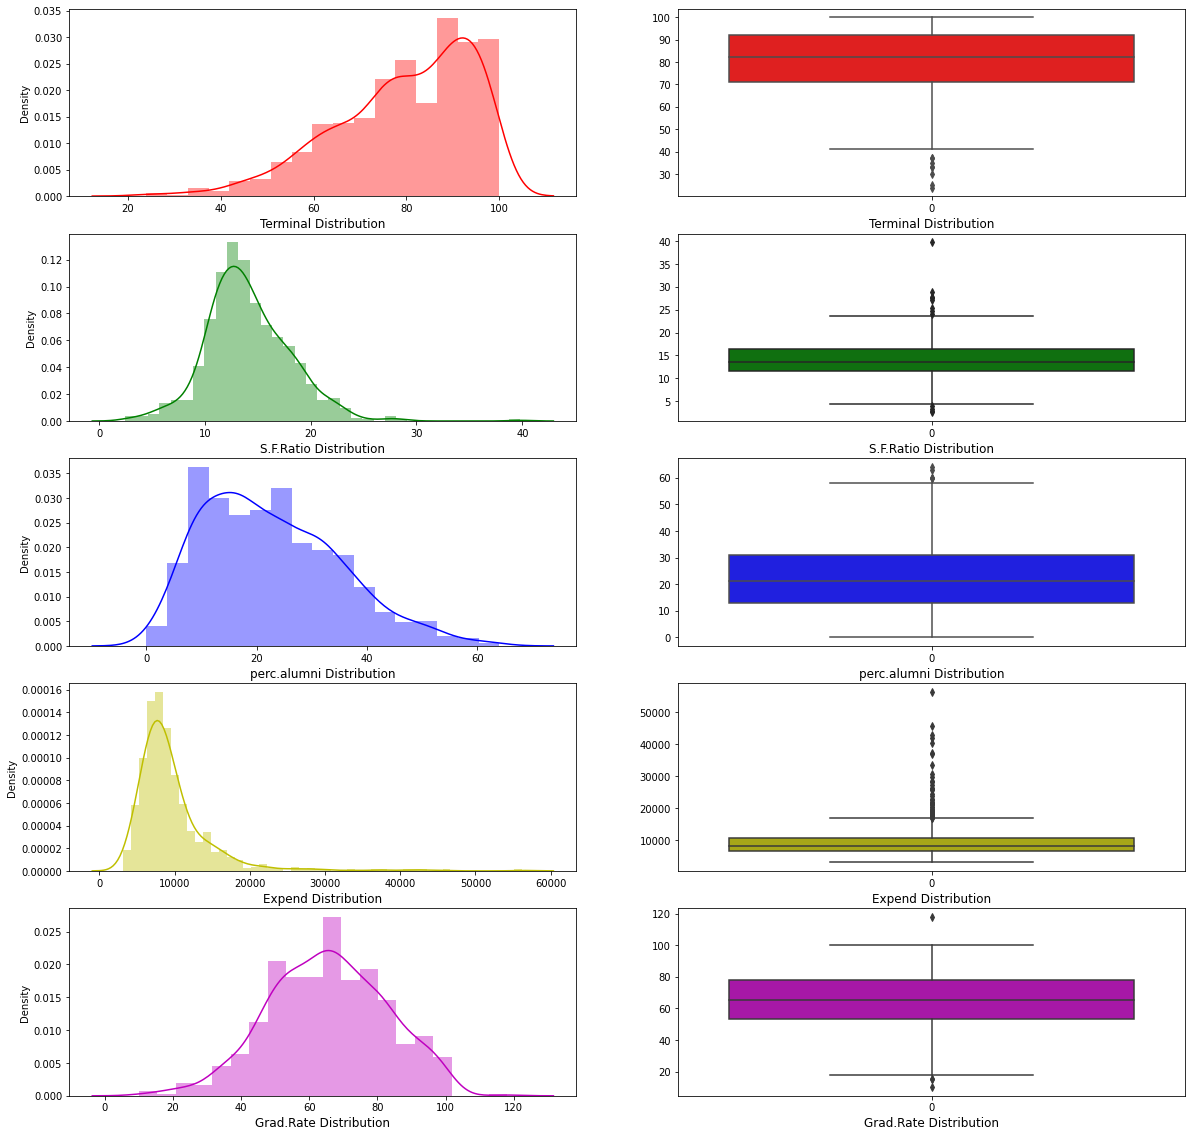

In [ ]:
fig6, axes6 = plt.subplots(nrows=5,ncols=2)
fig6.set_size_inches(20, 20)

a4 = sns.distplot(x=edu_df['Terminal'], ax=axes6[0,0], color='R');
a4.set_xlabel('Terminal Distribution', size=12);
b4 = sns.boxplot(data=edu_df['Terminal'], orient = "v", ax=axes6[0,1], color='R');
b4.set_xlabel('Terminal Distribution', size=12);

a4 = sns.distplot(x=edu_df['S.F.Ratio'], ax=axes6[1,0], color='G');
a4.set_xlabel('S.F.Ratio Distribution', size=12);
b4 = sns.boxplot(data=edu_df['S.F.Ratio'], orient = "v", ax=axes6[1,1], color='G');
b4.set_xlabel('S.F.Ratio Distribution', size=12);

a4 = sns.distplot(x=edu_df['perc.alumni'], ax=axes6[2,0], color='B');
a4.set_xlabel('perc.alumni Distribution', size=12);
b4 = sns.boxplot(data=edu_df['perc.alumni'], orient = "v", ax=axes6[2,1], color='B');
b4.set_xlabel('perc.alumni Distribution', size=12);

a4 = sns.distplot(x=edu_df['Expend'], ax=axes6[3,0], color='Y');
a4.set_xlabel('Expend Distribution', size=12);
b4 = sns.boxplot(data=edu_df['Expend'], orient = "v", ax=axes6[3,1], color='Y');
b4.set_xlabel('Expend Distribution', size=12);

a4 = sns.distplot(x=edu_df['Grad.Rate'], ax=axes6[4,0], color='M');
a4.set_xlabel('Grad.Rate Distribution', size=12);
b4 = sns.boxplot(data=edu_df['Grad.Rate'], orient = "v", ax=axes6[4,1], color='M');
b4.set_xlabel('Grad.Rate Distribution', size=12);

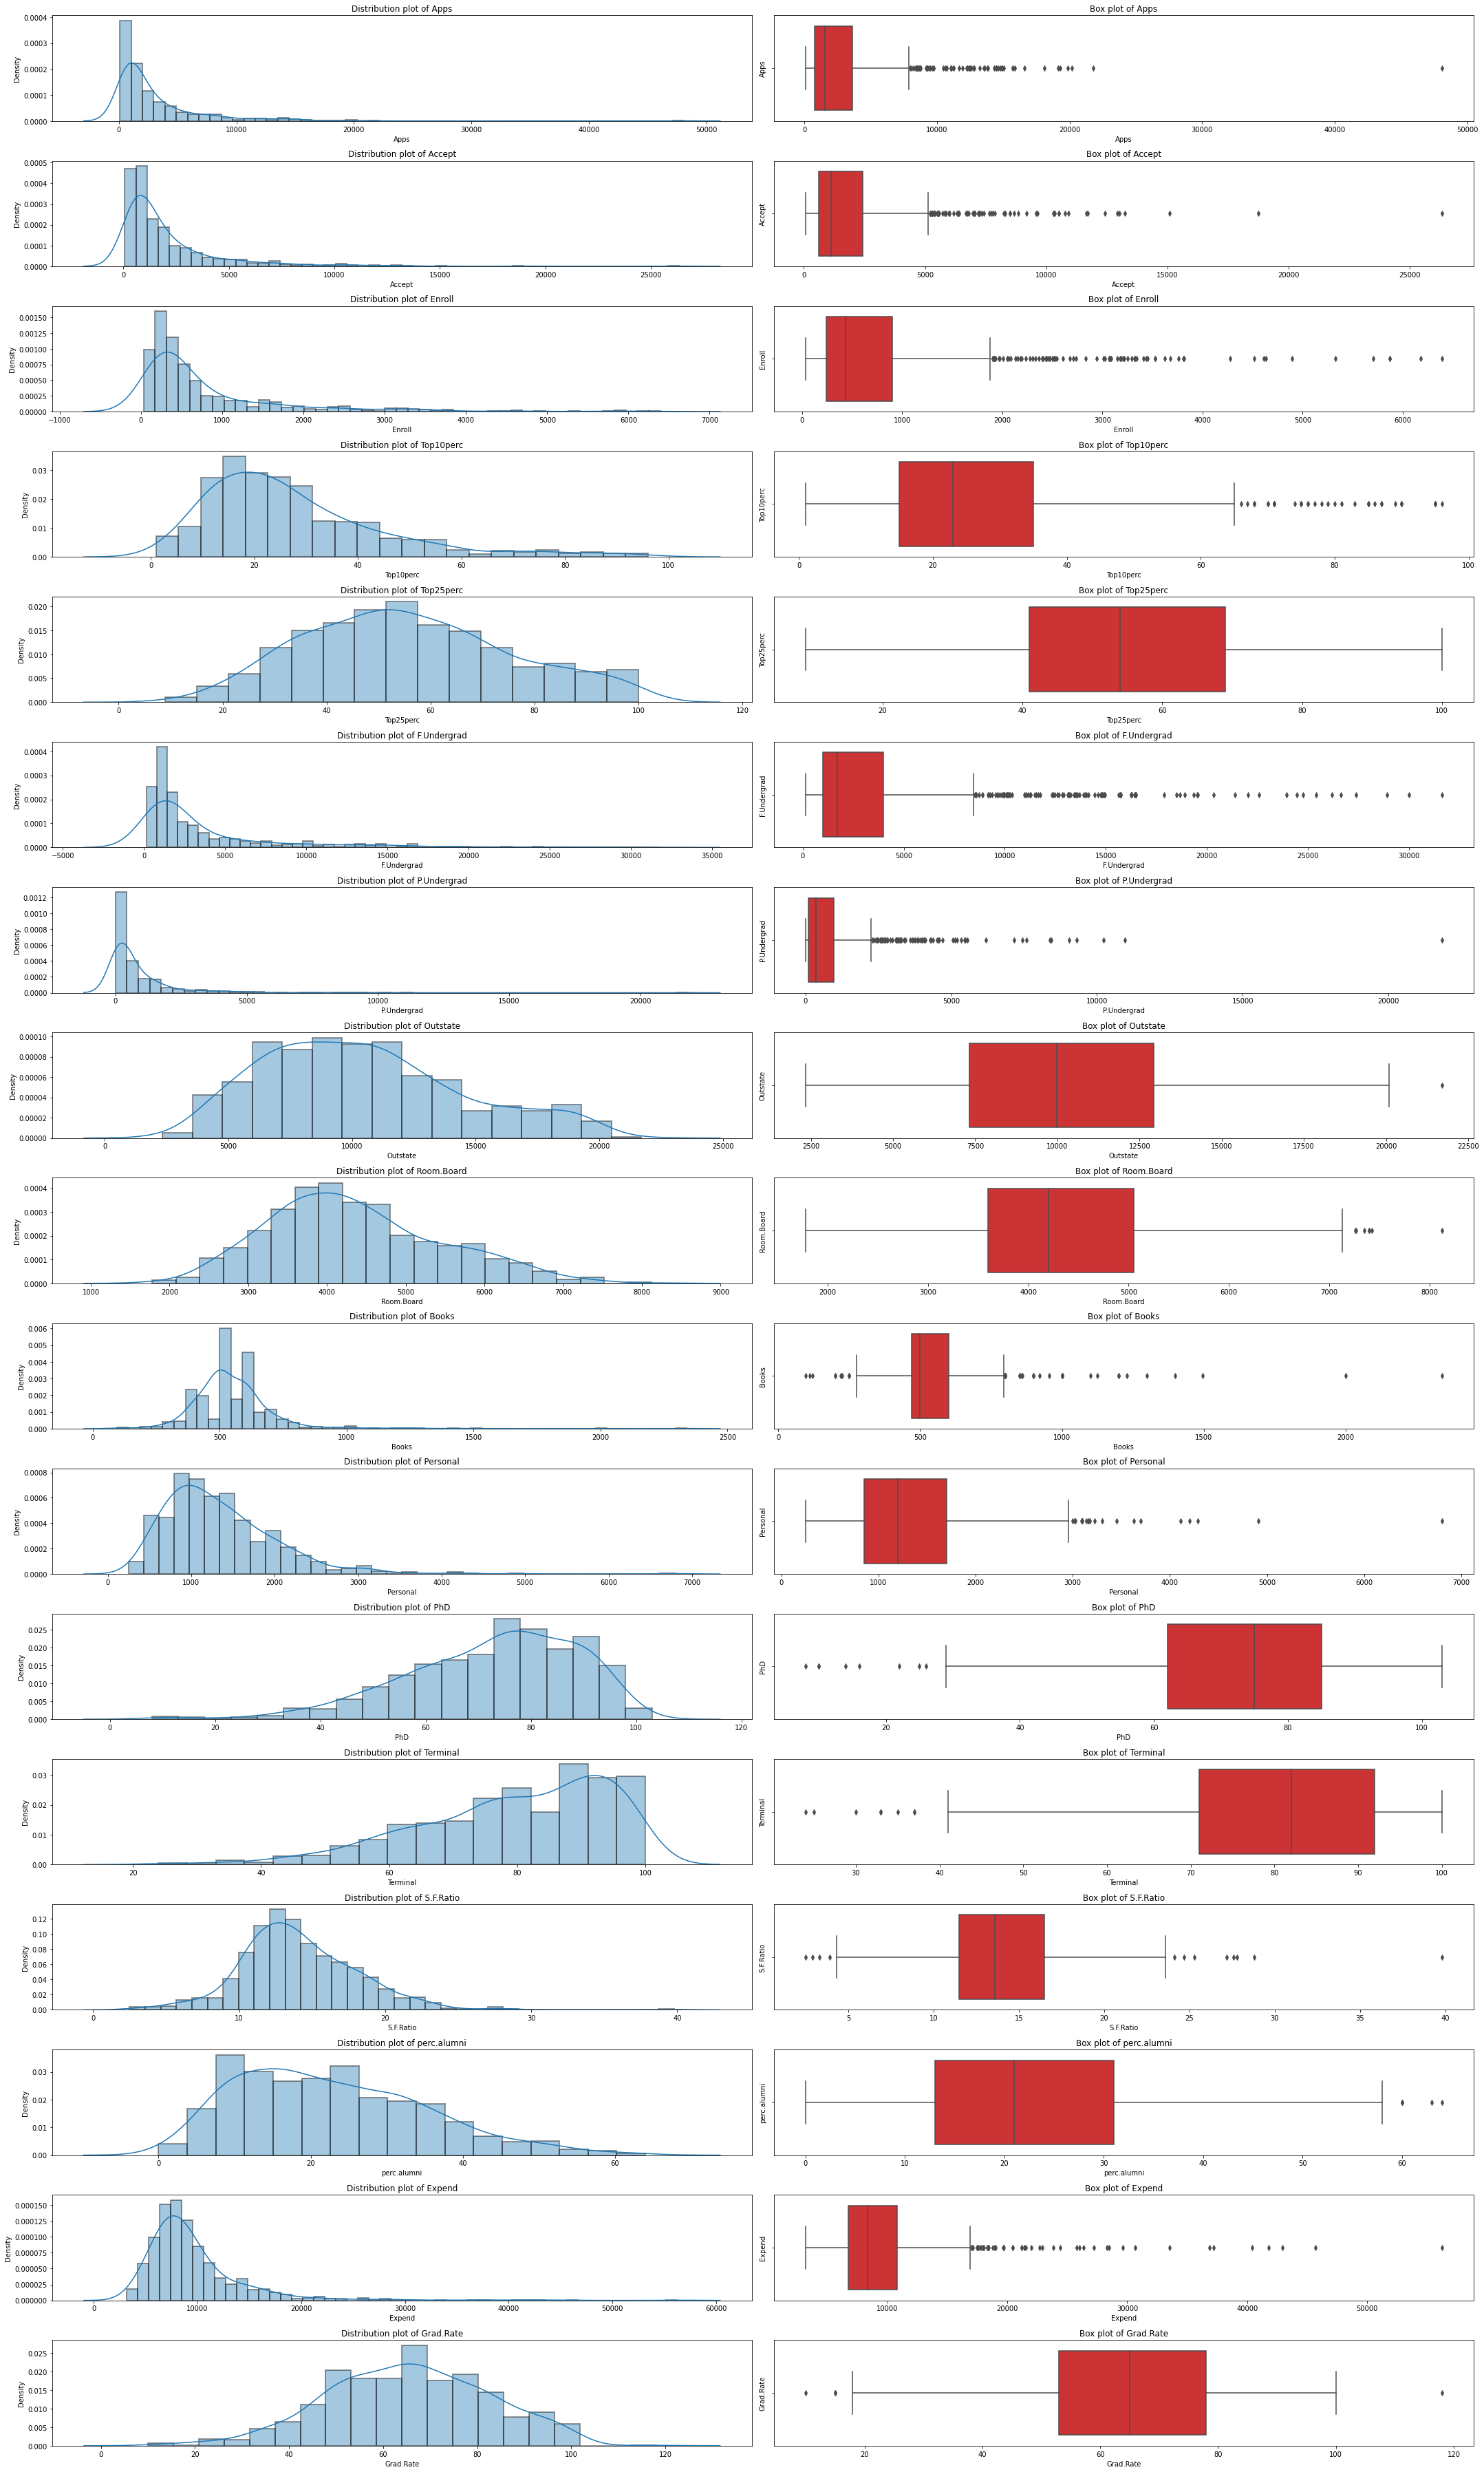

In [ ]:
#  Alternate and simple way
a = 17  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig13 = plt.figure(figsize=(30,50))

for i in col_list:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(num_edu_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = num_edu_df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

## **BI_VARIATE ANALYSIS**

In [ ]:
col_list = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate']

In [ ]:
len(col_list)

17

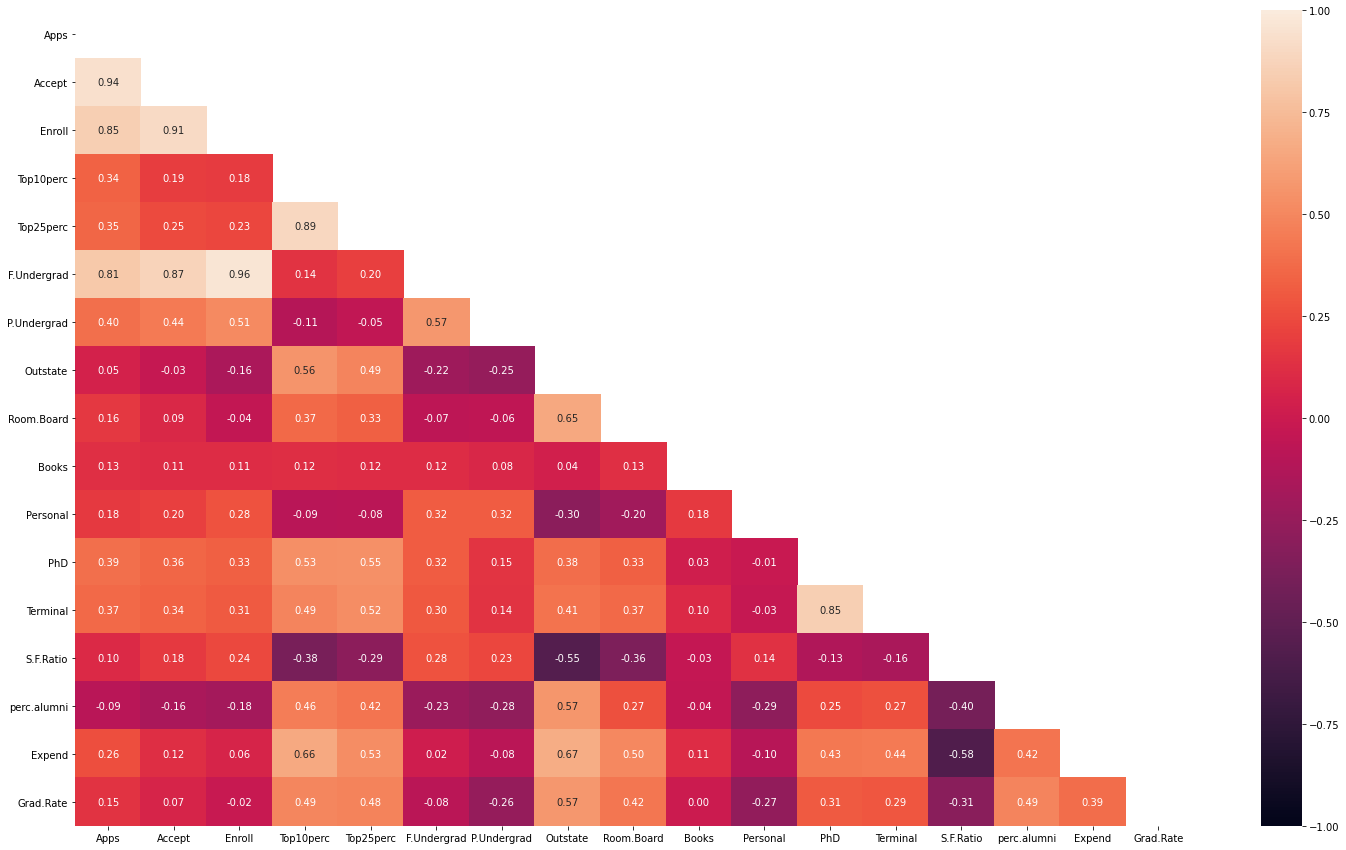

In [ ]:
# Generate correlation heatmap
corr = edu_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig7 = plt.subplots(figsize=(25, 15))
sns.heatmap(edu_df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask, cbar='b' )
plt.show()

In [ ]:
# Pair plot
fig14 = plt.figure(figsize=(30,50))
sns.pairplot(data=num_edu_df, palette='Set1');
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **SCALING**

In [ ]:
# Drop the Names Column

num_edu_df = edu_df.drop(columns='Names')
num_edu_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
# Z-Score Scaling
from scipy.stats import zscore

scaled_edu_df = num_edu_df.apply(zscore)
scaled_edu_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


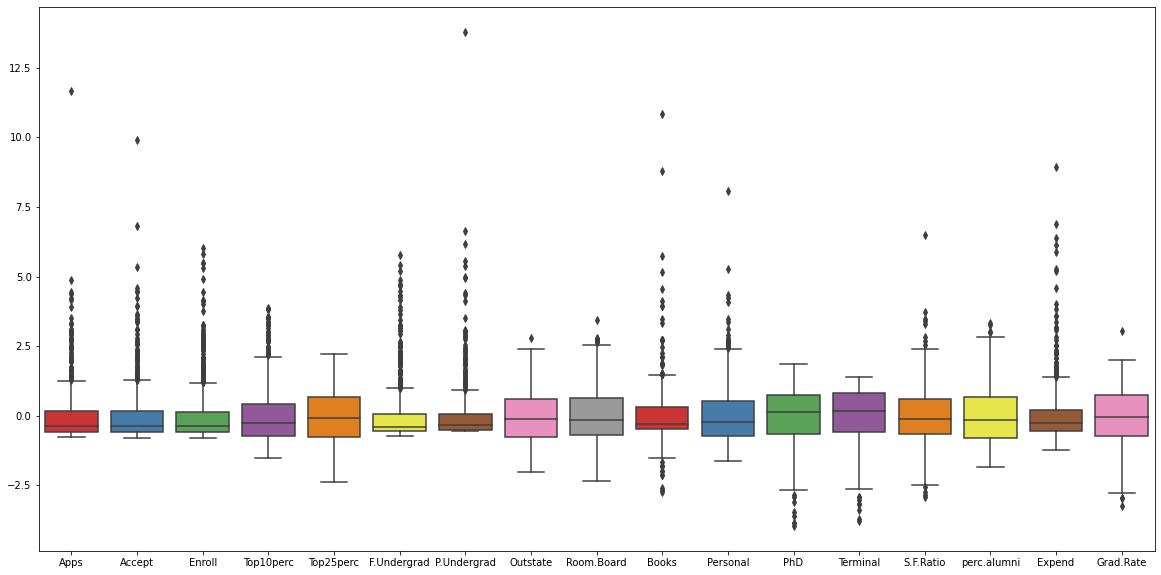

In [ ]:
# Box plots of the variables after scaling
fig8, axes8 = plt.subplots(nrows=1,ncols=1)
fig8.set_size_inches(20, 10)
sns.boxplot(data=scaled_edu_df, palette='Set1', ax=axes8);

In [ ]:
# Covariance Matrix

cov_df = scaled_edu_df.cov()
cov_df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In [ ]:
# Correlation matrix
cor_df = scaled_edu_df.corr(method='pearson')
cor_df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


## **PCA**

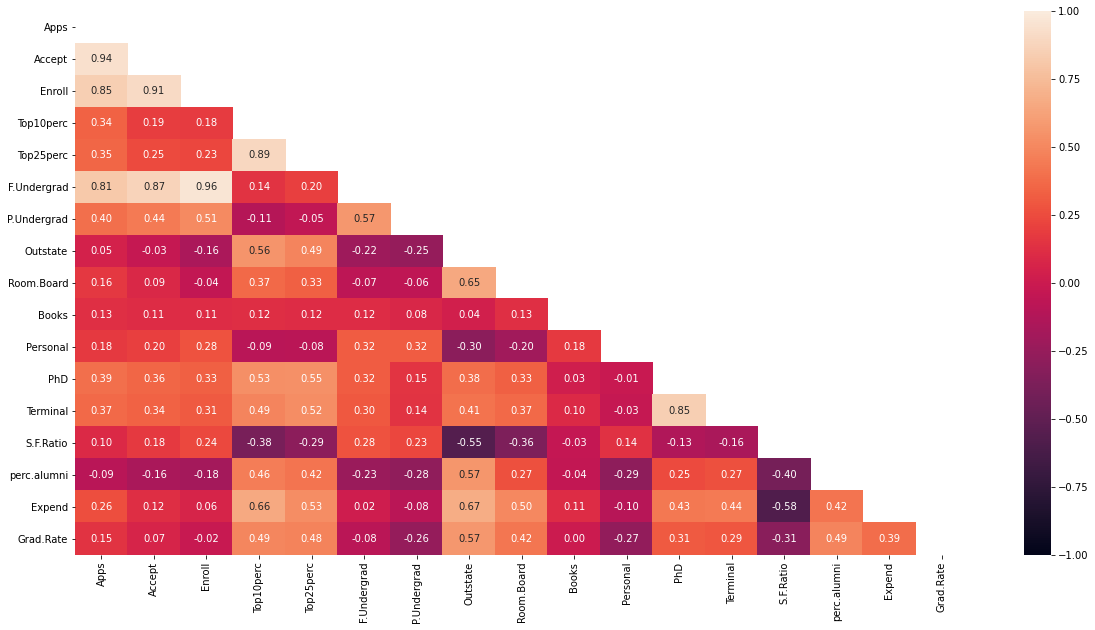

In [ ]:
# Check the correlation in the scaled dataframe
mask1 = np.triu(np.ones_like(cor_df, dtype=np.bool))
fig9 = plt.subplots(figsize=(20, 10))
sns.heatmap(cor_df, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.show()

In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_edu_df)
p_value

0.0

In [ ]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_edu_df)
kmo_model

0.8131251200373526

In [ ]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(scaled_edu_df)

In [ ]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [ ]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [ ]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
pca_coef_df = pd.DataFrame(pca.components_.T, columns = col_list, index = scaled_edu_df.columns)
pca_coef_df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


In [ ]:
pca_col_list = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
pca_coef_df1 = pd.DataFrame(pca.components_.T, columns = pca_col_list, index = scaled_edu_df.columns)
pca_coef_df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs without transpose
pca_coef_df2 = pd.DataFrame(pca.components_, columns = col_list, index = pca_col_list)
pca_coef_df2

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
PC2,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
PC3,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
PC4,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
PC5,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
PC6,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
PC7,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
PC8,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336
PC9,-0.090227,-0.177865,-0.128561,0.341100,0.403712,-0.059442,0.560673,-0.004573,0.275023,-0.133663,-0.094469,-0.185182,-0.254938,0.274544,-0.255335,-0.049139,0.041904
PC10,0.052510,0.041140,0.034488,0.064026,0.014549,0.020847,-0.223106,0.186675,0.298324,-0.082029,0.136028,-0.123452,-0.088578,0.472045,0.423000,0.132286,-0.590271


## **Scree Plot**

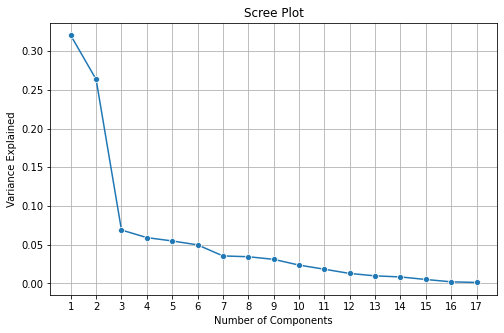

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.xticks(ticks= range(1,18))
plt.grid()
plt.show()

## **Explained Variances**

In [ ]:
exp_var = np.round(pca.explained_variance_ratio_, decimals=4)*100
exp_var

array([32.02, 26.34,  6.9 ,  5.92,  5.49,  4.98,  3.56,  3.45,  3.12,
        2.38,  1.84,  1.3 ,  0.99,  0.85,  0.52,  0.22,  0.14])

In [ ]:
# Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
cum_exp_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)
cum_exp_var

array([ 32.02,  58.36,  65.26,  71.18,  76.67,  81.65,  85.21,  88.66,
        91.78,  94.16,  96.  ,  97.3 ,  98.29,  99.14,  99.66,  99.88,
       100.02])

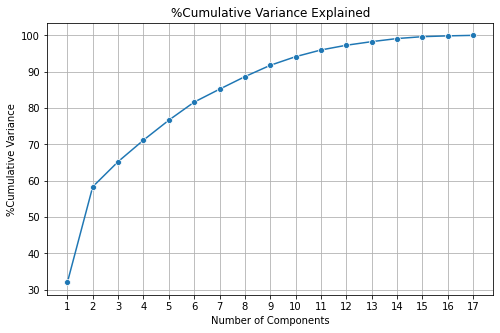

In [ ]:
# Create the lineplot of the percentage of the cumulative variance
plt.figure(figsize=(8,5))
sns.lineplot(y=cum_exp_var ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('%Cumulative Variance',fontsize=10)
plt.title('%Cumulative Variance Explained',fontsize=12)
plt.xticks(ticks= range(1,18))
plt.grid()
plt.show()


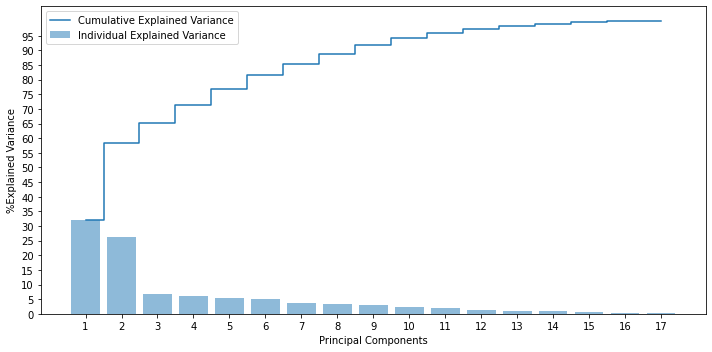

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(1,18), exp_var, alpha=0.5, align='center', label = 'Individual Explained Variance' )
plt.step(range(1,18), cum_exp_var, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('%Explained Variance')
plt.xticks(ticks= range(1,18))
plt.yticks(ticks=range(0,100,5))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Since 8 PCs captures above 85% of the variance we will take only those PCs

## **Final PCA**

In [ ]:
#Choose the PCs basis cumulative explained variance
pca_df_selected = pca_coef_df1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']]
pca_df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293


In [ ]:
pca_df_selected1 = pca_coef_df2.iloc[0:8]
pca_df_selected1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
PC2,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
PC3,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
PC4,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
PC5,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
PC6,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
PC7,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
PC8,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336


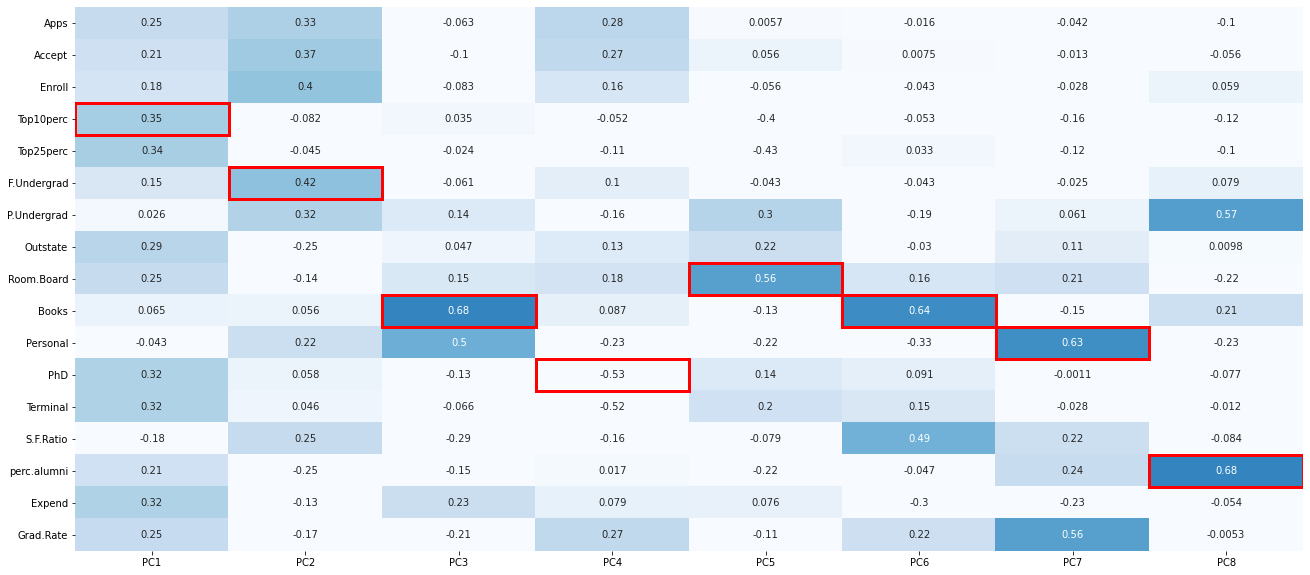

In [ ]:
from matplotlib.patches import Rectangle

fig10,axes10 = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
axes10 = sns.heatmap(pca_df_selected, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=axes10)

column_max = pca_df_selected.abs().idxmax(axis=0)

for col, variable in enumerate(pca_df_selected.columns):
    position = pca_df_selected.index.get_loc(column_max[variable])
    axes10.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

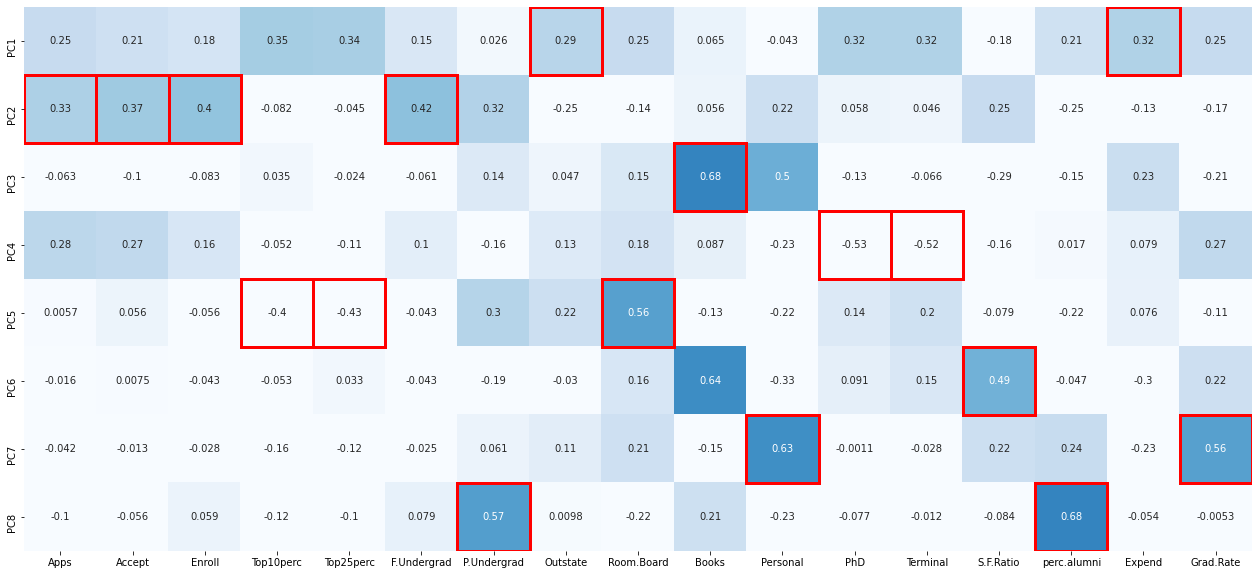

In [ ]:
from matplotlib.patches import Rectangle

fig11,axes11 = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
axes11 = sns.heatmap(pca_df_selected1, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=axes11)

column_max = pca_df_selected1.abs().idxmax(axis=0)

for col, variable in enumerate(pca_df_selected1.columns):
    position = pca_df_selected1.index.get_loc(column_max[variable])
    axes11.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [ ]:
#Apply PCA taking only 8 features
from sklearn.decomposition import PCA
pca1 = PCA(n_components=8, random_state=123)
pca_transformed1 = pca1.fit_transform(scaled_edu_df)

In [ ]:
#Extract eigen vectors
pca1.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [ ]:
#Check the eigen values
#Note: This is always returned in descending order
pca1.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222])

In [ ]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca1.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621])

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs without transpose
pca_coef_df3 = pd.DataFrame(pca1.components_, columns = col_list, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_coef_df3

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
PC2,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
PC3,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
PC4,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
PC5,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
PC6,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
PC7,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
PC8,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336


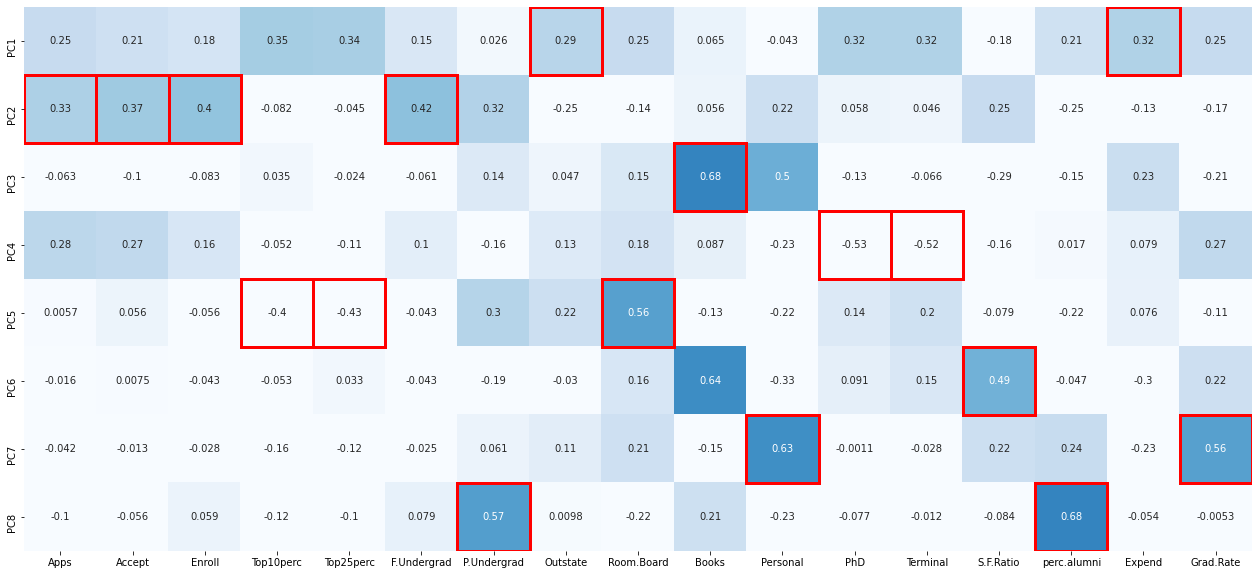

In [ ]:
from matplotlib.patches import Rectangle

fig12,axes12 = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
axes12 = sns.heatmap(pca_coef_df3, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=axes12)

column_max = pca_coef_df3.abs().idxmax(axis=0)

for col, variable in enumerate(pca_coef_df3.columns):
    position = pca_coef_df3.index.get_loc(column_max[variable])
    axes12.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

## **MISCELLANEOUS PLOTTING**

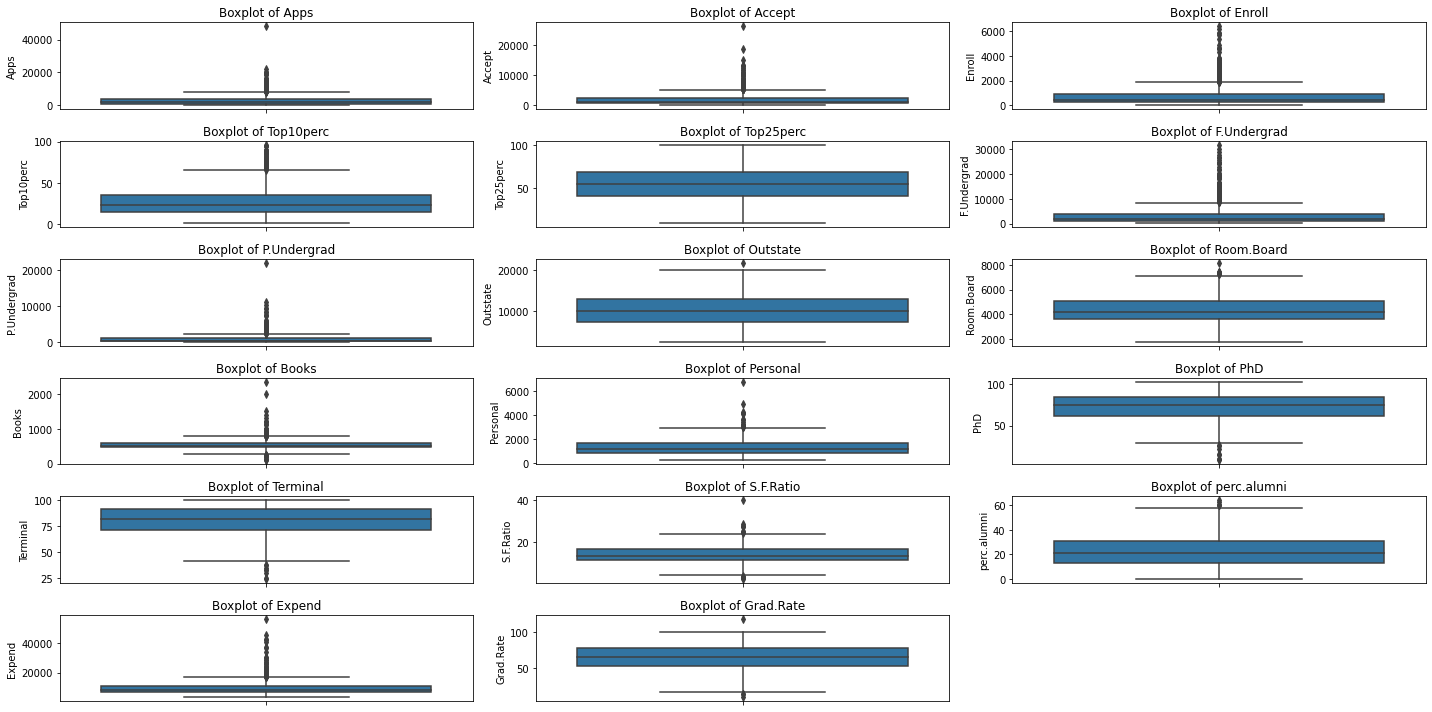

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,10))
feature_list = num_edu_df.columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y = num_edu_df[feature_list[i]], data = num_edu_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()